In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

### Basic Mathematics

In [17]:
def f(x):
    return 3*x**2-4*x+5


In [18]:
f(3)
xs=np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

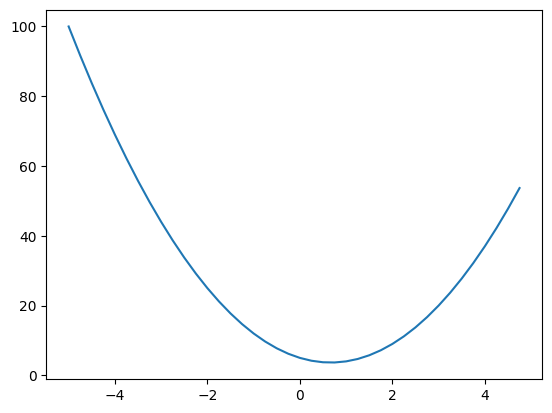

In [19]:
ys=f(xs)
plt.plot(xs,ys)

In [20]:
## create the function with some small difference
h=0.00000000001
x=3
f(x+h) # slightly higher than the value of f(x)

## derivative 
(f(x+h)-f(x))/h

14.000178794049134

In [21]:
a=2
b=-3
c=10
d=a*b+c
print(d)

4


In [22]:
h=0.0001
#
a=2
b=-3
c=10
d1=a*b+c
# increment a with small value of h
a=a+h 
d2=a*b+c ## new value after new a value

print(d1)
print(d2)
print('slope',(d2-d1)/h)

4
3.999699999999999
slope -3.000000000010772


### Creating a class with many operators and derivative of it 

In [ ]:
class Value:
    def __init__(self,data,_children=(), _op='', label=''):
        self.data = data
        self.grad=0 ## initually gradiant is zero 
        self._backward = lambda: None
        self._prev=set(_children)
        self._op=_op
        self.label=label
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out=Value(self.data+ other.data, (self, other),'+')
        
        def _backward():
            self.grad=1*out.grad
            other.grad=1*out.grad
        out._backward=_backward
        return out
        
    
    def __mul__(self, other):
        out=Value(self.data*other.data, (self, other),'*')
        return out
     
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/((math.exp(2*x)+1))
        out=Value(t, (self, ), 'tanh') ## (self,) makes it a 1-element tuple, which can be iterated over later
        return out


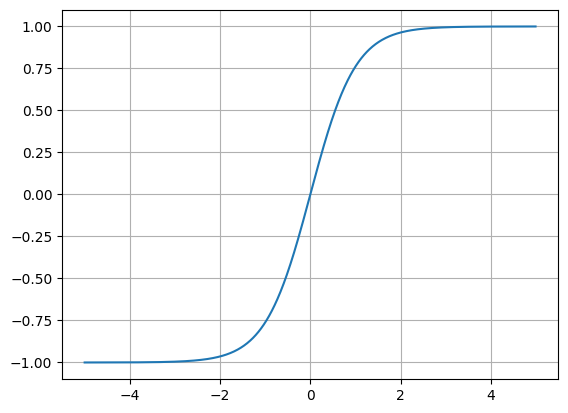

In [24]:
## Visualization of tanh

plt.plot(np.arange(-5,5,.01), np.tanh(np.arange(-5,5,.01)))
plt.grid()

In [25]:
## visualization function

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)
 
  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

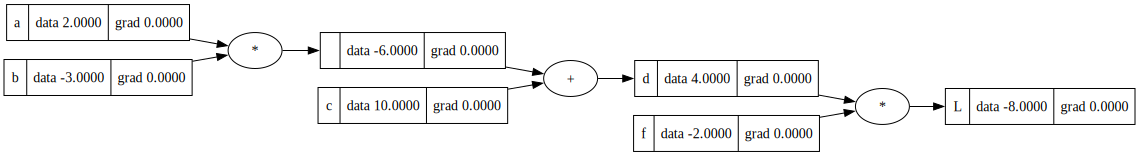

In [26]:
a= Value(2.0, label='a')
b= Value(-3.0, label='b')
c= Value(10.0, label='c')
e=a*b
e.label='e'
d=a*b+c
d.label='d'
f=Value(-2.0, label='f')
L=d*f
L.label='L'

draw_dot(L)

In [27]:
## this is a partial derivative where I changed it a with some very small value and checking the value of L wrt small change in a ie h
## kind of finite difference method

def lol():

    h=0.00001

    a= Value(2.0, label='a')
    b= Value(-3.0, label='b')
    c= Value(10.0, label='c')
    e=a*b
    e.label='e'
    d=a*b+c
    d.label='d'
    f=Value(-2.0, label='f')
    L=d*f
    L.label='L'
    L1=L.data

    a= Value(2.0, label='a') ## changing the value of a with some little value of h
    b= Value(-3.0, label='b')
    c= Value(10.0, label='c')
    e=a*b
    e.label='e'
    d=a*b+c
    d.label='d'
    f=Value(-2.0+h, label='f')
    L=d*f
    L.label='L'
    L2=L.data

    print((L2-L1)/h)


lol()    

4.000000000026205


In [28]:
## now want to find the value dL/dc

## chain rule is working in this function 
## dL/dc=(dL/dd)*(dd/dc)


def lol():

    h=0.00001

    a= Value(2.0, label='a')
    b= Value(-3.0, label='b')
    c= Value(10.0, label='c')
    e=a*b
    e.label='e'
    d=a*b+c
    d.label='d'
    f=Value(-2.0, label='f')
    L=d*f
    L.label='L'
    L1=L.data

    a= Value(2.0, label='a') ## changing the value of a with some little value of h
    b= Value(-3.0, label='b')
    c= Value(10.0+h, label='c')
    e=a*b
    e.label='e'
    d=a*b+c
    d.label='d'
    f=Value(-2.0+h, label='f')
    L=d*f
    L.label='L'
    L2=L.data

    print((L2-L1)/h)

    
lol()    

2.0000100001027477


### Now building  the first single Artificial neuron!! 

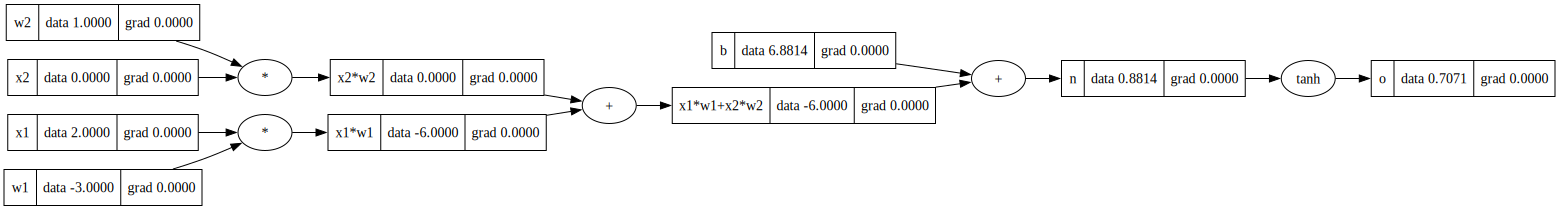

In [31]:
#x1, x2 are inputs of the neurons
x1=Value(2,label='x1')
x2=Value(0,label='x2')

## w1, w2 are weights of the neurons
w1=Value(-3,label='w1')
w2=Value(1,label='w2')


## bias for the single AN
b=Value(6.88137, label='b')


x1w1=x1*w1
x1w1.label='x1*w1'

x2w2=x2*w2
x2w2.label='x2*w2'

x1w1x2w2=x1w1+x2w2
x1w1x2w2.label='x1*w1+x2*w2'

n=x1w1x2w2+b
n.label='n'

o=n.tanh()
o.label='o'

draw_dot(o)


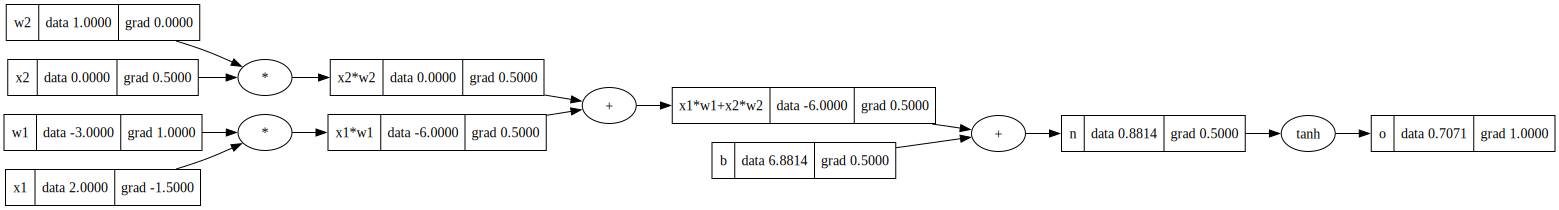

In [30]:
## doing it manually

o.grad=1 ##do/do=1
## o=tanh(n)
## do/dn=1-(tanh(n)**2) = 1-o**2

n.grad=1-(o.data**2)

## + is a distribution of grad

x1w1x2w2.grad=.5
b.grad=0.5

x1w1.grad=.5
x2w2.grad=0.5

x2.grad = w2.data * x2w2.grad

w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad

w1 .grad = x1.data * x1w1.grad

draw_dot(o)